<a href="https://colab.research.google.com/github/VarunMadhav/StockPredict/blob/master/stocknewwwwwwww.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas numpy matplotlib scikit-learn tensorflow keras

In [2]:
import pandas_datareader as pdr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import math
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv('AAPL.csv')

In [4]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-20,45.880001,46.087502,45.070000,45.772499,44.174919,154449200
1,2019-05-21,46.305000,47.000000,46.174999,46.650002,45.021790,113459200
2,2019-05-22,46.165001,46.427502,45.637501,45.695000,44.100105,118994400
3,2019-05-23,44.950001,45.134998,44.452499,44.915001,43.347347,146118800
4,2019-05-24,45.049999,45.535000,44.654999,44.742500,43.180859,94858800
...,...,...,...,...,...,...,...
1255,2024-05-14,187.509995,188.300003,186.289993,187.429993,187.429993,52393600
1256,2024-05-15,187.910004,190.649994,187.369995,189.720001,189.720001,70400000
1257,2024-05-16,190.470001,191.100006,189.660004,189.839996,189.839996,52845200
1258,2024-05-17,189.509995,190.809998,189.179993,189.869995,189.869995,41260800


In [6]:
df1 = df.reset_index()['Close']


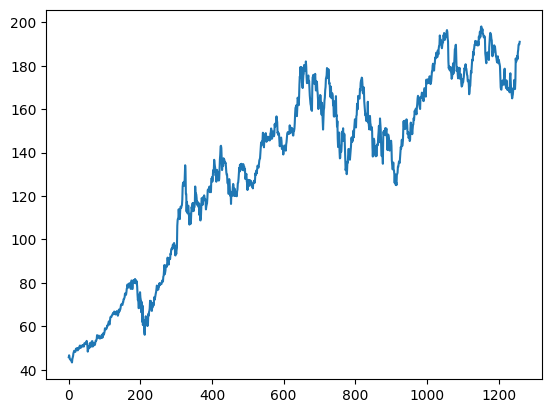

In [7]:
plt.plot(df1)
plt.show()

In [8]:
scaler = MinMaxScaler(feature_range=(0, 1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1, 1))

In [9]:
training_size = int(len(df1) * 0.65)
test_size = len(df1) - training_size
train_data, test_data = df1[0:training_size, :], df1[training_size:len(df1), :1]

In [10]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [11]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [12]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [13]:
model.fit(X_train, y_train, validation_data=(X_test, ytest), epochs=100, batch_size=64, verbose=1)


Epoch 1/100
12/12 [==============================] - 11s 429ms/step - loss: 0.0728 - val_loss: 0.0465
Epoch 2/100
12/12 [==============================] - 2s 179ms/step - loss: 0.0125 - val_loss: 0.0018
Epoch 3/100
12/12 [==============================] - 2s 178ms/step - loss: 0.0060 - val_loss: 0.0148
Epoch 4/100
12/12 [==============================] - 2s 178ms/step - loss: 0.0030 - val_loss: 0.0047
Epoch 5/100
12/12 [==============================] - 2s 187ms/step - loss: 0.0022 - val_loss: 0.0017
Epoch 6/100
12/12 [==============================] - 3s 299ms/step - loss: 0.0021 - val_loss: 0.0016
Epoch 7/100
12/12 [==============================] - 2s 187ms/step - loss: 0.0021 - val_loss: 0.0029
Epoch 8/100
12/12 [==============================] - 2s 180ms/step - loss: 0.0019 - val_loss: 0.0031
Epoch 9/100
12/12 [==============================] - 2s 184ms/step - loss: 0.0020 - val_loss: 0.0031
Epoch 10/100
12/12 [==============================] - 2s 180ms/step - loss: 0.0018 - val_l

In [14]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

11/11 [==============================] - 0s 39ms/step


In [15]:
print(f"Train RMSE: {math.sqrt(mean_squared_error(y_train, train_predict))}")
print(f"Test RMSE: {math.sqrt(mean_squared_error(ytest, test_predict))}")


Train RMSE: 128.05330043992123
Test RMSE: 174.71467237909866


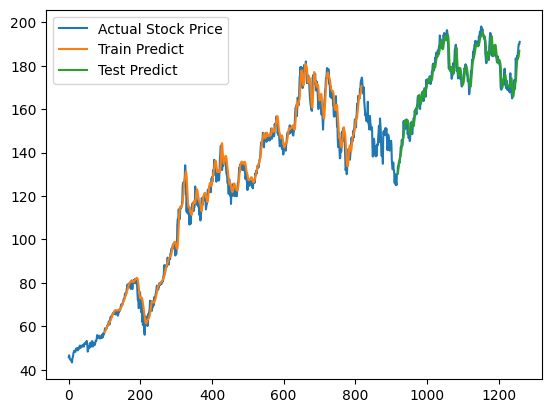

In [52]:
look_back = 100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2) + 1:len(df1) - 1, :] = test_predict
plt.plot(scaler.inverse_transform(df1), label="Actual Stock Price")
plt.plot(trainPredictPlot, label="Train Predict")
plt.plot(testPredictPlot, label="Test Predict")
plt.legend()
plt.show()

In [53]:
x_input = test_data[len(test_data) - time_step:].reshape(1, -1)
temp_input = list(x_input[0])

lst_output = []
n_steps = time_step
i = 0
while i < 200:
    if len(temp_input) > 100:
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i += 1


In [54]:
predicted_value_after_200_days = scaler.inverse_transform(np.array(lst_output[-1]).reshape(-1, 1))
print(f"{predicted_value_after_200_days[0][0]}")

180.6700237895379


In [55]:
plt.figure(figsize=(14, 7))

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

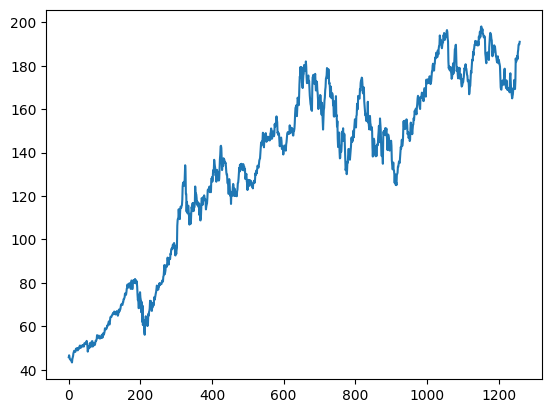

In [56]:
plt.plot(scaler.inverse_transform(df1), label="Actual Stock Price")

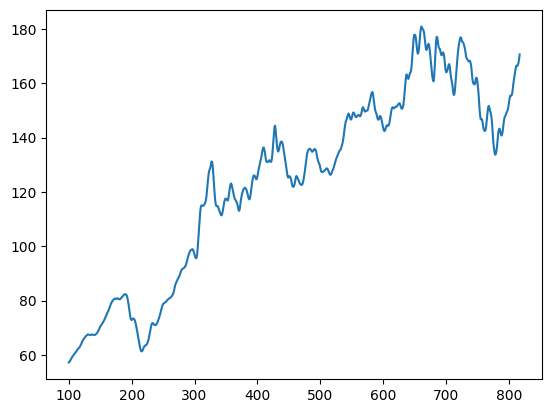

In [57]:
plt.plot(trainPredictPlot, label="Train Predict")

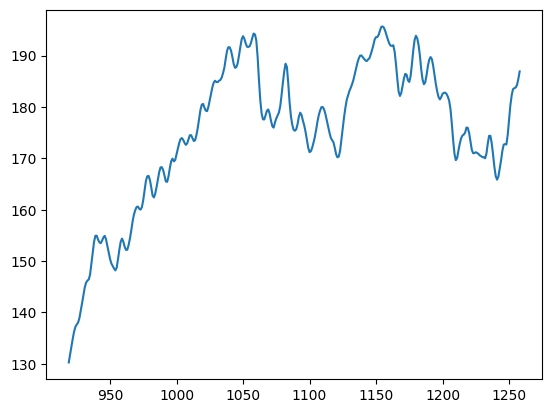

In [58]:
plt.plot(testPredictPlot, label="Test Predict")

In [59]:
extended_df1 = np.concatenate((df1, np.zeros((200, 1))), axis=0)

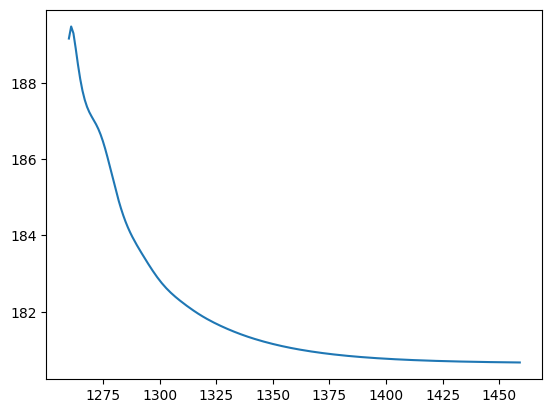

In [60]:
future_predict_plot = np.empty_like(extended_df1)
future_predict_plot[:, :] = np.nan
future_predict_plot[len(df1):len(df1) + 200, :] = scaler.inverse_transform(np.array(lst_output).reshape(-1, 1))
plt.plot(future_predict_plot, label="Future Predict (200 days)")